In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:

inspector = inspect(engine)
#inspector.get_table_names()
#inspector = inspect(engine)

In [9]:
inspector.get_table_names()

['measurement', 'station']

In [10]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)




# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
# SELECT .. -> dATAFRAME -> plot

# Exploratory Climate Analysis

In [13]:
fechas = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
fechas

('2017-08-23')

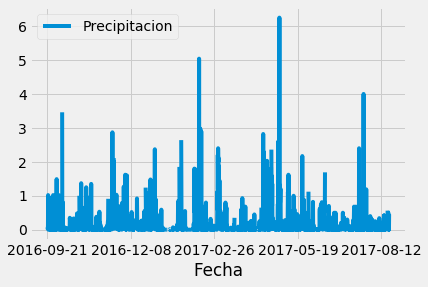

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_twelve  = dt.date(2017, 8, 23) - dt.timedelta(weeks = 4 * 12)
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve).all()

df  = pd.DataFrame(precipitation, columns=['Fecha', 'Precipitacion'])
df.set_index('Fecha', inplace=True)

resultado = df.sort_values(by='Fecha', ascending=True)
resultado.plot()


# Use Pandas Plotting with Matplotlib to plot the data

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitacion
count,1859.000000
mean,0.161334
std,0.421330
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


In [16]:
# Design a query to show how many stations are available in this dataset?
station = session.query(Station).count()
station
print("The number of stations is ", station)

The number of stations is  9


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_counts = session.query(Station.name, Station.station, func.count(Measurement.id)).filter(Station.station == Measurement.station).\
group_by(Station.station)

most_active = station_counts.order_by(func.count(Measurement.id).desc())
most_active = most_active[0]
print("The most Active station is ",most_active)


The most Active station is  ('WAIHEE 837.5, HI US', 'USC00519281', 2772)


In [35]:
most_active = station_counts.order_by(func.count(Measurement.id).desc()).all()

most_active



[('WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('PEARL CITY, HI US', 'USC00517948', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [43]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
lowest_temp
print("The lowest temperature recorder is", lowest_temp[0][0])
print("The maximum temperature recorder is", lowest_temp[0][1])
print("The average temperature recorder is", lowest_temp[0][2])

The lowest temperature recorder is 54.0
The maximum temperature recorder is 85.0
The average temperature recorder is 71.66378066378067


In [52]:
# Choose the station with the highest number of temperature observations.
numObservations = session.query(Station.name, Station.station, func.max(Measurement.tobs)).filter(Station.station == Measurement.station).\
group_by(Station.station)

numObservations = numObservations.order_by(func.max(Measurement.tobs).desc()).all()

print("The station with highest number of temperature observations is", numObservations[0][0])


The station with highest number of temperature observations is WAIKIKI 717.2, HI US


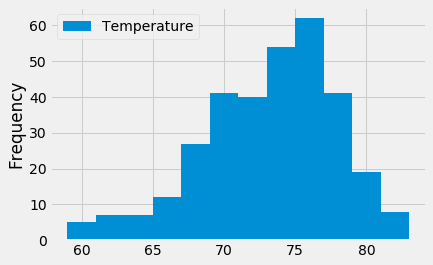

In [54]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_twelve  = dt.date(2017, 8, 23) - dt.timedelta(weeks = 4 * 12)
precipitation = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= last_twelve).all()

df  = pd.DataFrame(precipitation, columns=['Temperature'])
df.plot.hist(bins=12)

